<a href="https://colab.research.google.com/github/Ashishkumarpanda/Product-Review-Bot/blob/main/Amazon_Alexa_Review_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
a = files.upload()

Saving amazon_alexa.tsv to amazon_alexa (1).tsv


# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("amazon_alexa.tsv",sep="\t")
data.head(7)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1


# PERFORMING EDA ON THE DATASET

In [ ]:
columns = []
for i in data.columns:
  columns.append(i)
columns

['rating', 'date', 'variation', 'verified_reviews', 'feedback']

In [ ]:
for i in columns:
  print("number of uinque values in",i,"is = ",len(np.unique(data[i])))

number of uinque values in rating is =  5
number of uinque values in date is =  77
number of uinque values in variation is =  16
number of uinque values in verified_reviews is =  2301
number of uinque values in feedback is =  2


In [ ]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
data.shape

(3150, 5)

In [ ]:
data.drop(labels="date",axis = 1,inplace=True)

In [ ]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
data['variation'] = LabelEncoder().fit_transform(data['variation'])

In [ ]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1
3,5,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,5,Music,1


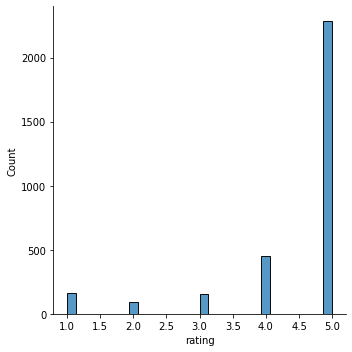

In [ ]:
sns.displot(data,x='rating',legend=True)

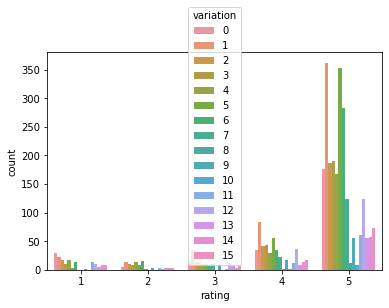

In [ ]:
sns.countplot(x='rating',hue='variation',data=data)

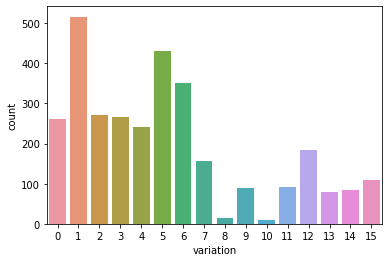

In [ ]:
sns.countplot(x='variation',data=data)

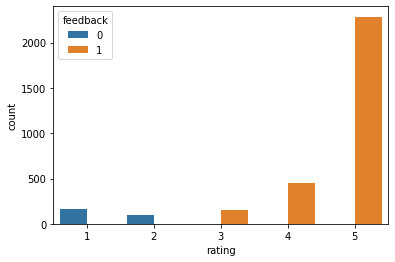

In [ ]:
sns.countplot(x='rating',hue='feedback',data=data)

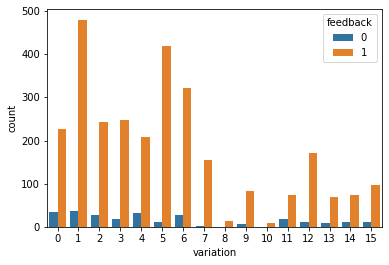

In [ ]:
sns.countplot(x='variation',hue='feedback',data=data)

In [ ]:
data.drop(labels=['variation','rating'],axis =1 ,inplace = True)

In [ ]:
total_value = len(data['feedback'])
positive_comment = []
negative_comment = []

for i in data['feedback']:
  if i == 1:
    positive_comment.append(data['feedback'])
  else:
    negative_comment.append(data['feedback'])

print(len(positive_comment),len(negative_comment))
percent_of_positive_comment = (len(positive_comment)/total_value)*100
percent_of_negative_comment = (len(negative_comment)/total_value)*100

print("percentage of positive comment = ",percent_of_positive_comment,"%")
print("percentage of negative comment = ",percent_of_negative_comment,"%")


2893 257
percentage of positive comment =  91.84126984126985 %
percentage of negative comment =  8.158730158730158 %


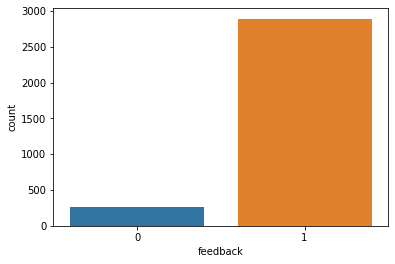

In [ ]:
sns.countplot(x='feedback',data=data)

# PREDICTING THE FEEDBACK TO OWN COMMENT

In [ ]:
data.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [ ]:
x = data['verified_reviews']
y = data['feedback']

In [ ]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(x)

In [ ]:
x = tokenizer.texts_to_sequences(x)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
x_pad = pad_sequences(x_train,maxlen=80,padding='post')
x_pad[0]

array([11,  8, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', class_weight={0:6, 1: 1})
randomforest_classifier.fit(x_train, y_train)
Y_train_predict = randomforest_classifier.predict(x_train)
Y_predict = randomforest_classifier.predict(x_test)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,Y_predict))

0.9105769230769231


# Plotting the output

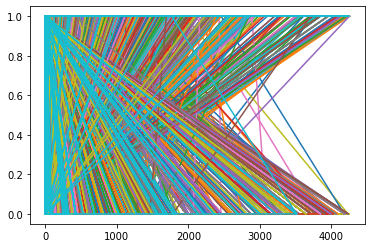

In [ ]:
plt.plot(x_train,randomforest_classifier.predict(x_train))
plt.show()

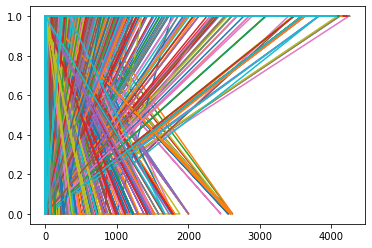

In [ ]:
plt.plot(x_test,randomforest_classifier.predict(x_test))
plt.show()

In [ ]:
def review_bot(feedback):
  sentence_lst=[]
  sentence_lst.append(feedback)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=randomforest_classifier.predict(sentence_padded)
  if ans.all() == 1:
    print("positive feedback")
  else:
    print("negative feedback")
review_bot(str(input("Enter a review : ")))

Enter a review : they tried and could have made it better.
positive feedback
